<a href="https://colab.research.google.com/github/macquarrielucas/Notes/blob/main/Ch1_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1

 R can generate numbers from all known distributions. We now know how to generate random discrete data using the specialized R functions tailored for each type of distribution. We use the functions that start with an r as in rXXXX, where XXXX could be pois, binom, multinom. If we need a theoretical computation of a probability under one of these models, we use the functions dXXXX, such as dbinom, which computes the probabilities of events in the discrete binomial distribution, and dnorm, which computes the probability density function for the continuous normal distribution. When computing tail probabilities such as it is convenient to use the cumulative distribution functions, which are called pXXXX. Find two other discrete distributions that could replace the XXXX above.

 **find all the functions that have to do with distributions in python**

## d-functions

In R, the dXXXX functions return the value of the pdf for the distribution XXXX at a given input (and some parameters for the distirbution). For example, the PDF for the gaussian is
$$f(x \mid \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$

so running
```
dnorm(x,\mu ,\sigma )
```
will return $f(x,\mu ,\sigma )$.

## p-functions
The pXXXX functions return the cumulative distribution function. For example, if we want the cdf of the gaussian distribution
$$F(q) = \int_{-∞}^q f(x|\mu, \sigma)dx $$

We can run
```
pnorm(q,\mu,\sigma)
```
To calculate from the other side, i. e
$$\int^{∞}_q f(x|\mu, \sigma)dx $$
we do
```
pnorm(q,\mu,\sigma, lower.tail=FALSE)
```

## q-functions
The qXXXX functions return the *inverse of the cumulative distribution function*. Returning to the example of the Gaussian, if
$$F(q) = \int_{-∞}^q f(x|\mu, \sigma)dx $$
we are interested in calculating
$$F^{-1}(p).$$

Note that the inverse is well defined because the CDF is monotonic. It answers the question "which value of $q$ in $F(q)$ will give an area of $p$?" i.e it returns the $p$'th percentile. Some people refer to this distribution as the ppf - Percent Point Function.

## r-functions

Instead of calculating data related to the distributions, *the rXXXX functions sample from a given distribution*. In particular, we can get a vector of $n$ samples from the Gaussia distribution by running
```
rnorm(n,\mu,\sigma)
```

## Python Scipy equivalents

Scipy takes a different approach to calculating statistics. Rather than have a different function for each statitic and each distribution, we should first create an instance of a distribution object and then call its methods to get the relevant information. A list of supported distributions can be found at:
https://docs.scipy.org/doc/scipy/reference/stats.html. By default, the distribution objects are standardized so calling
```
from scipy.stats import norm
rv1 = norm()
```
instantiates an object describing a normal distribution with mean $0$ and standard deviation $1$. To define one with mean $\mu$ and standard deviation $\sigma$ we need to use the loc and scale parameters like so
```
rv2 = norm(loc = \mu, scale = \sigma)
```
Scipy parameterizes their distributions with a generalized concept of location and scale rather than the typical parameters mathematiciations may be used to. To make sure, check the Scipy documentation to see how to define the distribution you want. Once you have instantiated your distribution object with your parameters of choice, getting the Scipy equaivalents of dXXXX, qXXXX, pXXXX, rXXXX is just method calls:

```
from scipy.stats import norm
rv = norm()
#Scipy             # R equivalent
rv.rvs(size=10)     #rnorm(size=10)
rv.pdf(x=0.5)       #dnorm(x=0.5)
rv.cdf(q=0.5)       #qnorm(q=0.5)
rv.ppf(p=0.5)       #pnorm(p=0.5)

```
where size,x,q,p values were chosen just for example.

# 1.2

Calculate the probability mass at $x=2$ for the binomial distribution $B(10,0.3)$. Then use the PMF to calculate the CMF at $x=2$ and compare with the value calculated with R (Python).


In [4]:
from scipy.stats import binom

rv = binom(n=10, p=0.3)
print(rv.pmf(2))
print(rv.pmf(0)+rv.pmf(1)+rv.pmf(2))
print(rv.cdf(2))

0.2334744405000001
0.38278278639999996
0.3827827863999998


# 1.3 / 1.4
Whenever we note that we keep needing a certain sequence of commands, it's good to put them into a function. The function body contains the instructions that we want to do over and over again, the function arguments take those things that we may want to vary. Write a function to compute the probability of having a maximum as big as m when looking across n Poisson variables with rate lambda.

Rewrite the function to have default values for its arguments (i.e., values that are used by it if the argument is not specified in a call to the function).


Sol: Let $X_i, i=1, \dots, n$ be independent samples from $Pois(\lambda)$. Whats the probability that $max(X_1, \dots, X_n)> m$?

In [15]:
import scipy.stats as sp
import numpy as np

def func(m=7,n=100,lam=0.5):
    pois = sp.poisson(lam)
    epsilon = 1 - pois.cdf(m-1) #1 - P(X < M)
    print(epsilon)
    return 1-np.exp(-n*epsilon)

func()

1.0023796028768572e-06


0.00010023293663119492

# 1.5

In the epitope example, use a simulation to find the probability of having a maximum of 9 or larger in 100 trials. How many simulations do you need if you would like to prove that “the probability is smaller than 0.000001”?



In [22]:


def trial():
    n,p= 100, 0.01
    lam = n*p
    pois = sp.poisson(lam)
    simulation = pois.rvs(size=100)
    if simulation.max() >= 9:
        return 1
    else:
        return 0

count = 0
for i in range(100000):
    count += trial()
print(count/100000)

8e-05


# 1.6
Use ?Distributions in R to get a list of available distributions17. Make plots of the probability mass or density functions for various distributions (using the functions named dXXXX), and list five distributions that are not discrete.

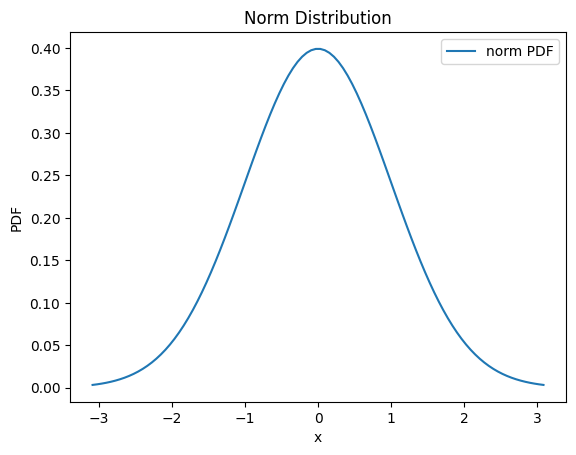

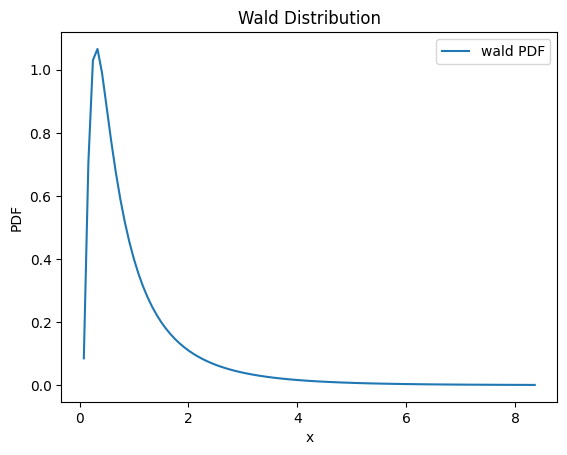

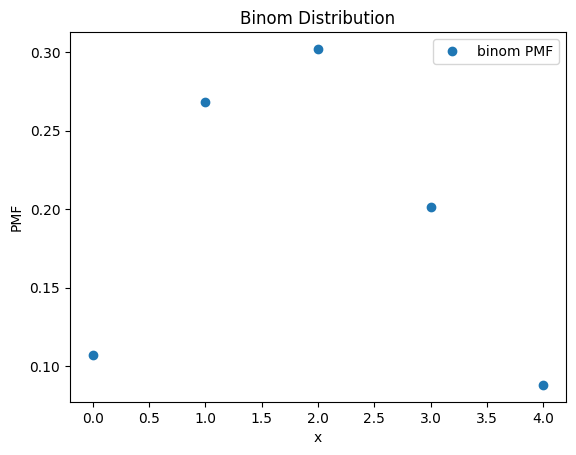

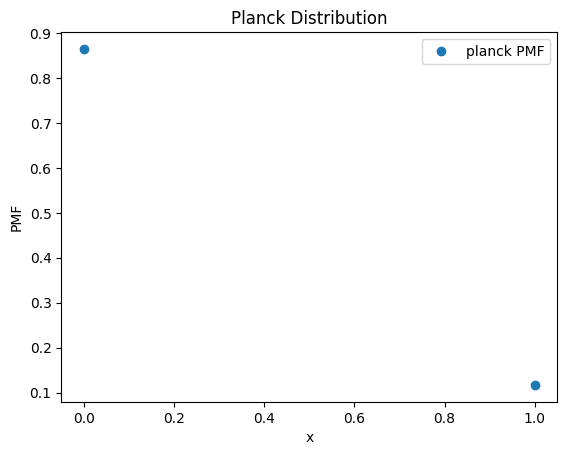

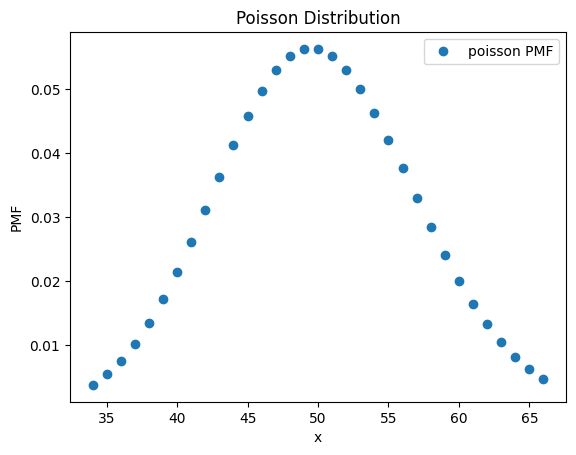

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

# Define the distributions
binom = sp.binom(10, 0.2)
norm = sp.norm()
planck = sp.planck(2)
wald = sp.wald()
poisson = sp.poisson(50)

cont_dists = [norm, wald]
dis_dists = [binom, planck, poisson]

# Plot continuous distributions individually
for dist in cont_dists:
    x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)
    plt.figure()
    plt.plot(x, dist.pdf(x), label=f'{dist.dist.name} PDF')
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.title(f'{dist.dist.name.capitalize()} Distribution')
    plt.legend()
    plt.show()

# Plot discrete distributions individually
for dist in dis_dists:
    x = np.arange(dist.ppf(0.01), dist.ppf(0.99))
    plt.figure()
    plt.plot(x, dist.pmf(x), label=f'{dist.dist.name} PMF', marker='o', linestyle='None')
    plt.xlabel('x')
    plt.ylabel('PMF')
    plt.title(f'{dist.dist.name.capitalize()} Distribution')
    plt.legend()
    plt.show()


In [37]:
pip install genomicranges

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.4 MB/s eta 0:00:00
